<a href="https://colab.research.google.com/github/HungVLe/CMPE255/blob/main/Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering Techniques**

In [ ]:
!pip install pycaret

In [ ]:
!pip install --upgrade numpy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.gridspec import GridSpec

In [4]:
X,y =  make_blobs(n_samples = 1000, n_features = 5, random_state = 100, centers = 5, cluster_std = 5)
print(X[:10],y[:10])

[[  1.80513573  14.33429971   6.13961105 -10.0660993   -2.18585062]
 [  6.55267319  -3.07012022  -2.1970935   -2.16471663  -4.28098362]
 [ -2.53995832  -0.47118917  10.87073221 -10.46234787   4.44728661]
 [ 12.49436975  -4.38240441 -11.92586705  -5.71508345  -8.6861135 ]
 [  5.9459564   -8.21950393   3.9201659   -8.92851242  -4.27991907]
 [  5.78570482   6.1380573   -3.2292299    8.91327417  -7.07267202]
 [  5.0934203    2.45133531  -7.5135897    2.38031145  -2.99736774]
 [  3.10282467  21.06462611   9.39246516  -0.96846243 -10.56520076]
 [ -4.66650192  12.00077544   6.29965857 -12.79685764   0.97842957]
 [ 12.73116245   3.13134647   1.84332991   5.08121448  -4.06402096]] [4 2 1 2 2 3 3 4 1 3]


In [5]:
def display_score(target, labels, name):
    acc=accuracy_score(y, labels)
    print("Accuracy score for", name, "is", acc)
    mat = confusion_matrix(target, labels)
    plt.figure(figsize=(10, 5))
    gs = GridSpec(1, 2, width_ratios=(1, 2))
    ax0 = plt.subplot(gs[0])
    ax0.matshow(mat, cmap='coolwarm', alpha=0.2)
    
    for i in range(5): # equals to centers
        for j in range(5):
            ax0.text(x=j, y=i, s=mat[i, j], ha="center", va="center")
    plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
    plt.xlabel("Predicted", fontdict={"fontsize": 14})
    plt.ylabel("Actual", fontdict={"fontsize": 14})

##**Kmean**

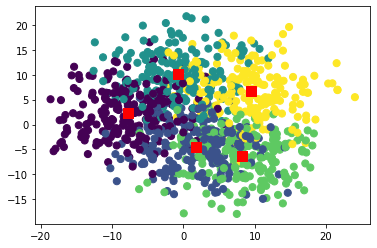

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

kmean_centers, kmean_labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=kmean_labels, s=50, cmap='viridis');
plt.scatter(kmean_centers[:, 0], kmean_centers[:, 1], color = 'red',  label = 'centroid',s=100,marker=',')

Accuracy score for Kmean is 0.018


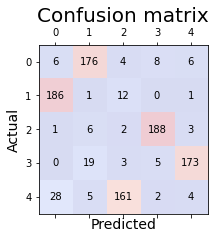

In [7]:
display_score(y, kmean_labels, "Kmean")

##**Hierarchical Clustering**

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

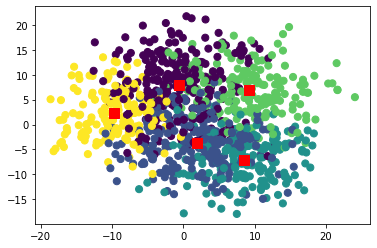

In [9]:
hierarchical_clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_predict = hierarchical_clustering_model.fit_predict(X)
hierarchical_clustering_labels = hierarchical_clustering_model.labels_

clf = NearestCentroid()
clf.fit(X, y_predict)
hierarchical_clustering_centers = clf.centroids_

plt.scatter(X[:, 0], X[:, 1], c=hierarchical_clustering_labels, s=50, cmap='viridis');
plt.scatter(hierarchical_clustering_centers[:, 0], hierarchical_clustering_centers[:, 1], color = 'red',  label = 'centroid',s=100,marker=',')

Accuracy score for Hierarchical Clustering is 0.356


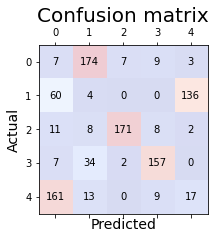

In [10]:
display_score(y, hierarchical_clustering_labels, "Hierarchical Clustering")

##**Gaussian Mixture**

In [11]:
from sklearn.mixture import GaussianMixture

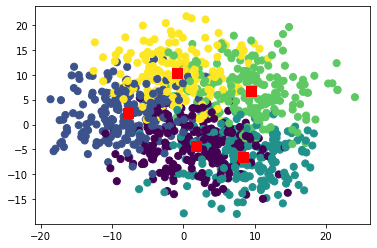

In [12]:
gmm = GaussianMixture(n_components=5).fit(X)
gmm_labels = gmm.predict(X)

clf = NearestCentroid()
clf.fit(X, gmm_labels)
gmm_centers = clf.centroids_

plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, s=50, cmap='viridis');
plt.scatter(gmm_centers[:, 0], gmm_centers[:, 1], color = 'red',  label = 'centroid',s=100,marker=',')

Accuracy score for Gaussian Mixture is 0.874


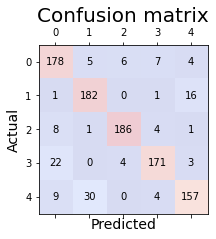

In [13]:
display_score(y, gmm_labels, "Gaussian Mixture")

##**DBSCAN**

In [14]:
from sklearn.cluster import DBSCAN

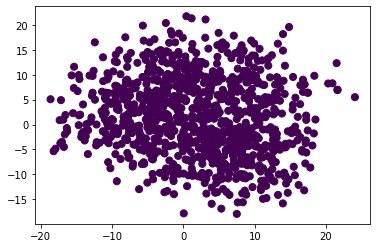

In [15]:
dbscan_model = DBSCAN()
dbscan_labels = dbscan_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50, cmap='viridis');

Accuracy score for DBSCAN is 0.0


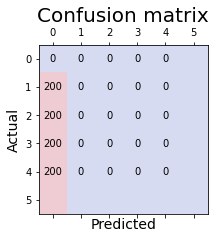

In [16]:
display_score(y, dbscan_labels, "DBSCAN")

##**DBSCAN using pycaret library**

In [17]:
from pycaret.clustering import *

In [18]:
cols = ['column1', 'column2', 'column3','column4', 'column5']
df = pd.DataFrame(data = X, columns = cols).reset_index()
cluster = setup(df,session_id = 7652)
dbscan_model = create_model('dbscan',  num_clusters = 5)
dbscan_results = assign_model(dbscan_model)
dbscan_results.head()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


,index,column1,column2,column3,column4,column5,Cluster
0,0,1.805136,14.334300,6.139611,-10.066099,-2.185851,Cluster -1
1,1,6.552673,-3.070120,-2.197093,-2.164717,-4.280984,Cluster -1
2,2,-2.539958,-0.471189,10.870732,-10.462348,4.447287,Cluster -1
3,3,12.494370,-4.382404,-11.925867,-5.715083,-8.686113,Cluster -1
4,4,5.945956,-8.219504,3.920166,-8.928512,-4.279919,Cluster -1


In [19]:
plot_model(dbscan_model, plot ='cluster')